Подключение необходимых библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Загрузка данных

In [1]:
from sklearn.datasets import fetch_openml
X,y= fetch_openml('mnist_784', return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
N,d=X.shape
N,d

(70000, 784)

Вывод нулевой строки -784 пикселей

In [4]:
X0=X[0,:]
X0

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
Каждой строке X[i] соотвествует значение y[0]. В данном случае y[0]='5'

In [5]:
y0=y[0]
y0

'5'

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
y.shape

(70000,)

In [9]:
y=y.astype('int8')
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

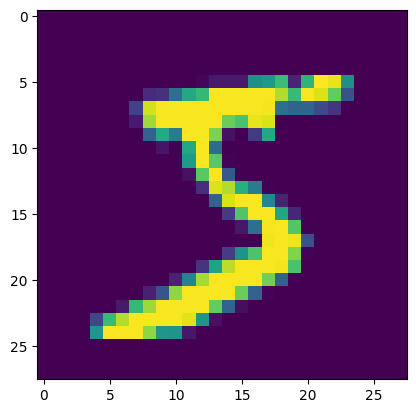

In [11]:
plt.imshow(np.reshape(X0,(28,28)))
%matplotlib inline

Функция draw_digit предзначена для вывода цифры, реального значения и предсказанного значения.  В качестве параметоров передается массив значений пикселей, реалная цифра и предсказанная.

In [12]:
def draw_digit(Img,true_digit,prediction=''):
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.reshape(Img,(28,28)))
  plt.text(0,27,str(true_digit),color='b')
  plt.text(0,1,str(prediction),color='r')
  plt.set_cmap('binary')

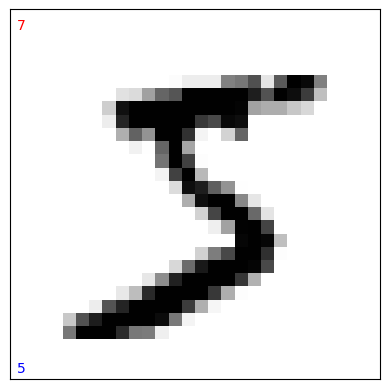

In [13]:
draw_digit(X0,y0,'7')

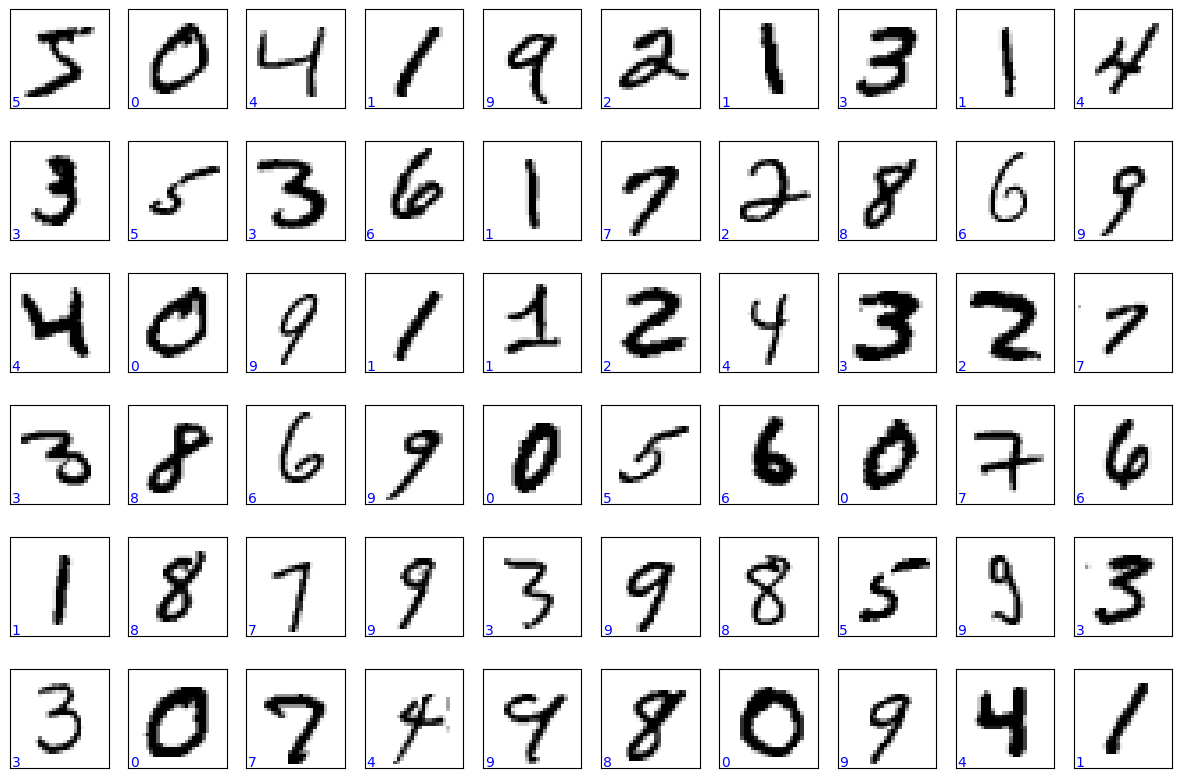

In [15]:
plt.figure(figsize=(15,10))
for i_subplot in range(60):
  plt.subplot(6,10,i_subplot+1)
  draw_digit(X[i_subplot,:],y[i_subplot])


In [17]:
N_test=10000
N_train=N-N_test
N_train,N_test

(60000, 10000)

In [18]:
N_train=6000
N_test=1000

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test= train_test_split(X,y,train_size=N_train,test_size=N_test,stratify=y,random_state=42)

In [20]:
X_train.shape,X_test.shape

((6000, 784), (1000, 784))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7,p=1)
model.fit(X_train,y_train)

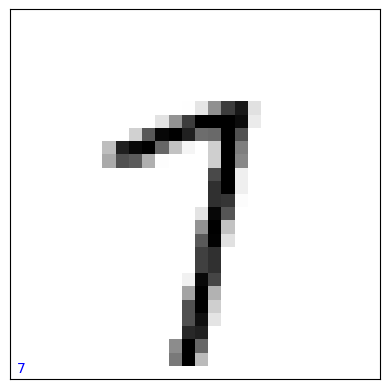

In [23]:
No=42
Img=X[42,:]
dig=y[No]
draw_digit(Img,dig)

In [24]:
model.predict([Img])

array([7], dtype=int8)

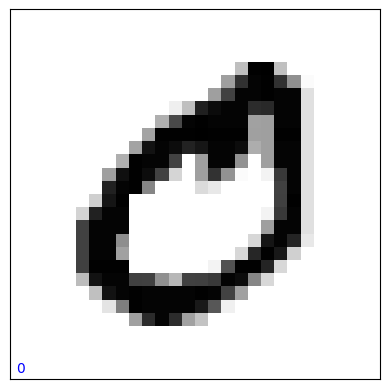

In [25]:
No=21
Img=X[No,:]
dig=y[No]
draw_digit(Img,dig)

In [26]:
model.predict([Img])

array([0], dtype=int8)

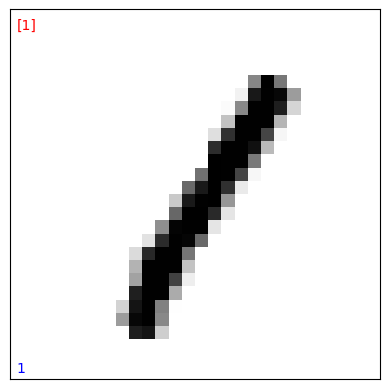

In [27]:
No=23
Img=X[No,:]
dig=y[No]
dig_pred=model.predict([Img])
draw_digit(Img,dig,dig_pred)

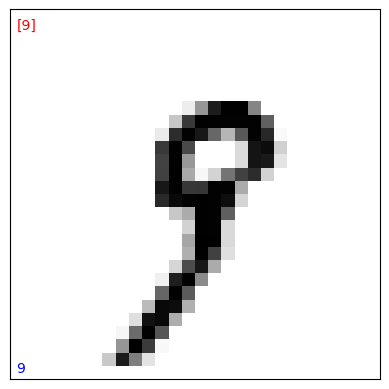

In [28]:
No=19
Img=X[No,:]
dig=y[No]
dig_pred=model.predict([Img])
draw_digit(Img,dig,dig_pred)

In [33]:
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)

In [35]:
y_train!=y_train_predict

array([False, False, False, ..., False, False, False])

In [36]:
y_test!=y_test_predict

array([ True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [37]:
mean_error_train,mean_error_test=np.mean(y_train!=y_train_predict),np.mean(y_test!=y_test_predict)
mean_error_train,mean_error_test

(0.0, 0.072)

In [38]:
model.score(X_train,y_train), model.score(X_test,y_test)

(1.0, 0.928)

In [39]:
1-model.score(X_test,y_test)

0.07199999999999995

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_predict)

array([[ 97,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0, 112,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   9,  85,   0,   0,   1,   0,   3,   0,   2],
       [  0,   1,   3,  95,   0,   1,   0,   0,   1,   1],
       [  0,   2,   0,   0,  91,   0,   1,   0,   0,   3],
       [  2,   2,   0,   0,   0,  83,   3,   0,   0,   0],
       [  1,   3,   0,   0,   0,   0,  94,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0, 100,   0,   3],
       [  1,   4,   0,   3,   1,   2,   1,   2,  82,   2],
       [  1,   2,   0,   0,   5,   0,   0,   2,   0,  89]])

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.82      0.99      0.90       113
           2       0.97      0.85      0.90       100
           3       0.97      0.93      0.95       102
           4       0.94      0.94      0.94        97
           5       0.95      0.92      0.94        90
           6       0.93      0.96      0.94        98
           7       0.93      0.96      0.95       104
           8       0.99      0.84      0.91        98
           9       0.88      0.90      0.89        99

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



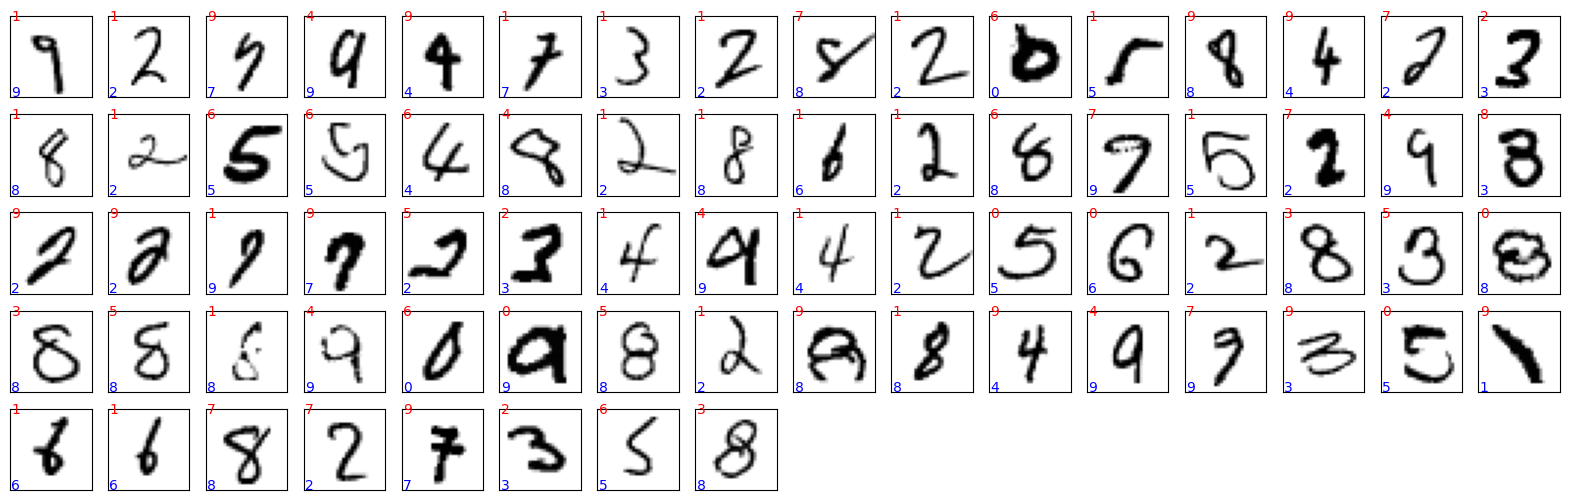

In [47]:
plt.figure(figsize=(20,10))
i_subplot=1
for i in range(N_test):
  img=X_test[i,:]
  dig=y_test[i]
  dig_pred=model.predict([img])[0]
  if dig_pred!=dig:
    plt.subplot(8,16,i_subplot)
    draw_digit(img,dig,dig_pred)
    i_subplot+=1